## Cosmological model-independent constraints on the baryon fraction in the IGM from fast radio bursts and supernovae data

## **DATA**

The observed **extragalactic** dispersion measure is defined as
$$
DM_{\rm ext}(z) \equiv DM_{\rm obs}(z) - DM_{\rm MW}.
$$

## Fast Radio Bursts (FRBs)

The observed dispersion measure of a FRB is given by
$$
DM_{\rm obs}(z) = DM_{\rm MW} + DM_{\rm IGM}(z) + DM_{\rm host}(z),
$$
where the Milky Way contribution is
$$
DM_{\rm MW} = DM_{\rm MW,ISM} + DM_{\rm MW,halo}.
$$

Following the paper, they assume a constant Milky Way halo contribution
$$
DM_{\rm MW,halo} = 50\;{\rm pc\,cm^{-3}}.
$$




In [1]:
import pandas as pd
import numpy as np


# FRB dataset from Table 1
frb_data = {
    "Name": [
        "FRB180916B","FRB201124A","FRB190608B","FRB200430A","FRB121102A",
        "FRB191001A","FRB190714A","FRB20191228A","FRB190102C","FRB180924B",
        "FRB20180301A","FRB20200906A","FRB190611B","FRB181112A","FRB190711A","FRB190523A"
    ],
    "z": [
        0.0337,0.098,0.1178,0.16,0.19273,
        0.234,0.2365,0.2432,0.291,0.3214,
        0.3305,0.3688,0.378,0.4755,0.522,0.66
    ],
    "DM_MW_ISM": [
        200.0,123.2,37.2,27.0,188.0,
        44.7,38.0,33.0,57.3,40.5,
        152.0,36.0,57.83,102.0,56.4,37.0
    ],
    "DM_obs": [
        348.8,413.52,338.7,380.25,557.0,
        506.92,504.13,297.5,363.6,361.42,
        536.0,577.8,321.4,589.27,593.1,760.8
    ],
    "sigma_obs": [
        0.2,0.5,0.5,0.4,2.0,
        0.04,2.0,0.05,0.3,0.06,
        8.0,0.02,0.2,0.03,0.4,0.6
    ]
}

df = pd.DataFrame(frb_data)
df.head()


,Name,z,DM_MW_ISM,DM_obs,sigma_obs
0,FRB180916B,0.03370,200.0,348.80,0.2
1,FRB201124A,0.09800,123.2,413.52,0.5
2,FRB190608B,0.11780,37.2,338.70,0.5
3,FRB200430A,0.16000,27.0,380.25,0.4
4,FRB121102A,0.19273,188.0,557.00,2.0


In [2]:
df["DM_MW"] = df["DM_MW_ISM"] + 50 # DM_halo = 50 pc/cm^3 
df["DM_ext"] = df["DM_obs"] - df["DM_MW"]

sigma_MW = 10 #pc/cm^3

df["DM_ext_err"] = np.sqrt((df["sigma_obs"])**2 + sigma_MW**2)

print(df.shape)
df.head()

(16, 8)


,Name,z,DM_MW_ISM,DM_obs,sigma_obs,DM_MW,DM_ext,DM_ext_err
0,FRB180916B,0.03370,200.0,348.80,0.2,250.0,98.80,10.002000
1,FRB201124A,0.09800,123.2,413.52,0.5,173.2,240.32,10.012492
2,FRB190608B,0.11780,37.2,338.70,0.5,87.2,251.50,10.012492
3,FRB200430A,0.16000,27.0,380.25,0.4,77.0,303.25,10.007997
4,FRB121102A,0.19273,188.0,557.00,2.0,238.0,319.00,10.198039


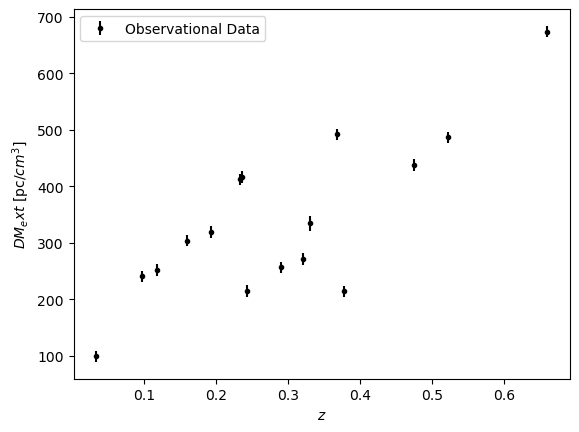

In [3]:
import matplotlib.pyplot as plt

DM_ext = df["DM_ext"].values
z_frb = df["z"].values
DM_ext_err = df["DM_ext_err"].values
#z0 = np.linspace(0, 2, 100)

plt.errorbar(z_frb, DM_ext, yerr=DM_ext_err, fmt='.k', capsize=0, label="Observational Data")
plt.xlabel(r"$z$")
plt.ylabel(r"$DM_ext$ [pc/$cm^3$]")
plt.legend()

## Type Ia Supernovae (Pantheon)

The Pantheon sample is used to reconstruct the luminosity distance
in a cosmology-independent way.

The distance modulus is defined as
$$
\mu(z) = m_B - M_B,
$$
with the absolute magnitude fixed to
$$
M_B = -19.214 \pm 0.037.
$$

The luminosity distance is then
$$
d_L(z) = 10^{(\mu - 25)/5}\;{\rm Mpc}.
$$


In [4]:
sn = pd.read_csv("lcparam_full_long.txt", 
                 delimiter=' ', 
                 #comment='#'
                 )

sn.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor,Unnamed: 19
0,03D1au,0.50309,0.50309,0.0,22.93445,0.12605,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,03D1ax,0.49480,0.49480,0.0,22.88020,0.11765,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,03D1co,0.67767,0.67767,0.0,24.03770,0.20560,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,03D1ew,0.86650,0.86650,0.0,24.34685,0.17385,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,03D1fq,0.79857,0.79857,0.0,24.36050,0.17435,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [5]:
sn_sorted = sn.sort_values(by="zcmb").reset_index(drop=True)

sn_sorted.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor,Unnamed: 19
0,2002cr,0.01012,0.01012,0.0,13.90745,0.19825,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,2002dp,0.01038,0.01038,0.0,14.04960,0.20480,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2009an,0.01043,0.01043,0.0,13.92480,0.20035,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,2006bh,0.01082,0.01082,0.0,14.00860,0.18445,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,1998dk,0.01209,0.01209,0.0,13.97910,0.19140,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [6]:
MB = -19.214 
sigma_MB = 0.037

zcmb_sorted = sn_sorted["zcmb"]


# compute dL obs
mu_sorted = sn_sorted["mb"] - MB

sigma_mu = np.sqrt((sn_sorted["dmb"].values)**2 + (sigma_MB)**2)




## Gaussian Process Reconstruction

A Gaussian Process (GP) regression is used to reconstruct the distance modulus
$\mu(z)$ from the Pantheon data and to obtain a smooth estimate of the luminosity
distance $d_L(z)$ and its uncertainty at the FRB redshifts.


In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

X = sn_sorted["zcmb"].values[:, np.newaxis]
y_mu = mu_sorted.values
y_err_mu = sigma_mu

## Gaussian Process Regressor
kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(
    length_scale=0.5,
    length_scale_bounds=(0.05, 5.0)
    )

gp_mu = GaussianProcessRegressor(
    kernel=kernel,
    alpha=y_err_mu**2,
    normalize_y=True,
    n_restarts_optimizer=10
    )

gp_mu.fit(X, y_mu)

#Generate test z
X_pred = np.linspace(0, 2.5, 1000)[:, np.newaxis]

y_pred_mu, sigma_mu_gp = gp_mu.predict(X_pred, return_std=True)

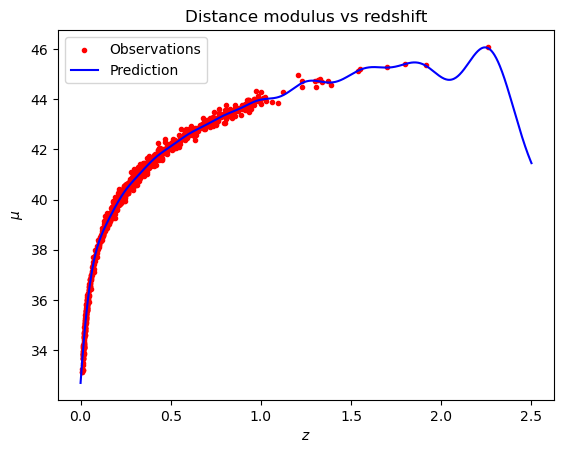

In [8]:
plt.scatter(X, y_mu, c='r', marker='.', label="Observations")
plt.plot(X_pred, y_pred_mu, 'b', label='Prediction')
plt.title('Distance modulus vs redshift')
plt.xlabel(r"$z$")
plt.ylabel(r"$\mu$")
plt.legend()

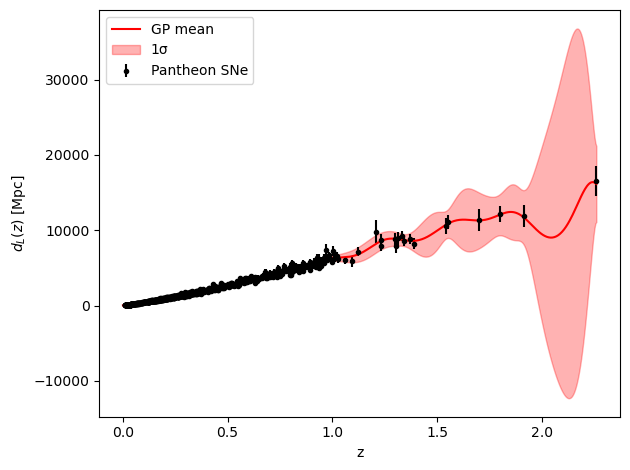

In [9]:
def mu_of_z(z):
    z = np.atleast_1d(z)[:, np.newaxis]
    mu_pred, sigma = gp_mu.predict(z, return_std=True)
    return mu_pred, sigma

def dL_of_z(z):
    mu_pred, sigma_mu = mu_of_z(z)
    dL = 10 ** ((mu_pred - 25)/5)
    sigma_dL = np.log(10)/5 * dL * sigma_mu
    return dL, sigma_dL


## VISUALIZATION    
z_vis = np.linspace(0, sn_sorted["zcmb"].values.max(), 500)
dL_vis, sigma_vis = dL_of_z(z_vis)

dL_obs = 10 ** ((mu_sorted - 25)/5)
sigma_dL_obs = sigma_dL = np.log(10)/5 * dL_obs * sigma_mu

plt.errorbar(sn_sorted["zcmb"].values, dL_obs, yerr=sigma_dL_obs,
             fmt=".k", capsize=0, label="Pantheon SNe")

plt.plot(z_vis, dL_vis, "r", label="GP mean")
plt.fill_between(
    z_vis,
    dL_vis.flatten() - sigma_vis.flatten(),
    dL_vis.flatten() + sigma_vis.flatten(),
    color="r", alpha=0.3, label="1σ"
)

plt.xlabel("z")
plt.ylabel(r"$d_L(z)$ [Mpc]")
plt.legend()
plt.tight_layout()
plt.show()

## **Model**

## Dispersion Measure Model

The theoretical extragalactic dispersion measure is 
$$
DM_{\rm ext}^{\rm th}(z) = DM_{\rm IGM}(z) + DM_{\rm host}(z).
$$


The host galaxy contribution is parameterized as
$$
DM_{\rm host}(z) = \frac{DM_{\rm host,0}}{1+z}.
$$


The intergalactic medium contribution is given by
$$
DM_{\rm IGM}(z) =
A \int_0^z \frac{(1+z')\, f_{\rm IGM}(z')}{H(z')} \, dz',
$$
where
$$
A = \frac{21\,c\,\Omega_b H_0^2}{64\pi G m_p}.
$$

For a constant baryon fraction,
$$
f_{\rm IGM}(z) = f_{\rm IGM,0},
$$
this expression can be written as
$$
DM_{\rm IGM}(z)
=
A f_{\rm IGM,0}
\left[
\frac{d_L(z)}{c}
-
\int_0^z \frac{d_L(z')}{c(1+z')} dz'
\right].
$$


In [14]:
from scipy.integrate import cumulative_trapezoid

# Constants (SI units)

H0_km_s_Mpc = 74.03  

c = 2.99792458e8                     # m.s^(-1)
G = 6.67430e-11                      # m^3 kg^(-1) s^(-2)
mp = 1.6726e-27                      # kg
H0 = 74.03 * 1e3 / (3.085677581e22)  # Hubble constant in s^-1 (from km/s/Mpc)
h = H0_km_s_Mpc / 100
obh2 = 0.02235
om_b = obh2 / (h**2)

A = (21 * c * om_b * H0**2) / (64 * np.pi * G * mp)

z_grid = np.linspace(0, z_frb.max(), 1000)
dL_grid, _ = dL_of_z(z_grid)               # dL evaluated on z_grid

def DM_host(z, DM_host_0):
    return DM_host_0 / (1+z)

I_grid = cumulative_trapezoid(dL_grid.flatten() / (c*(1+z_grid)), z_grid, initial=0)

def cumulativ_trap(z_values):
    z_values = np.atleast_1d(z_values)
    # Clip interpolation to avoid extrapolation outside z_grid
    z_values_clipped = np.clip(z_values, z_grid.min(), z_grid.max())
    return np.interp(z_values_clipped, z_grid, I_grid)

def DM_IGM(z, f_IGM_0):
    z = np.atleast_1d(z)
    dL, _ = dL_of_z(z)
    dL = dL.flatten()
    I = cumulativ_trap(z)
    return A * f_IGM_0 * (dL / c - I)

def DM_ext_th(params, z):
    f_IGM_0, DM_host_0 = params
    return DM_host(z, DM_host_0) + DM_IGM(z, f_IGM_0)



## Bayesian Inference

The free parameters in the constant $f_{\rm IGM}$ model are
$$
\{f_{\rm IGM,0},\, DM_{\rm host,0}\}.
$$


In [19]:
import emcee
import corner

def log_prior(params):
    f_IGM_0, DM_host_0 = params

    if 0 <= f_IGM_0 <= 1 and 100 <= DM_host_0 <= 200:
        return 0
    else:
        return -np.inf
    
def log_likelihood(params):
    DM_theory = DM_ext_th(params, z_frb)
    if np.any(~np.isfinite(DM_theory)):
        return -np.inf  # kill this walker proposal
    return -0.5 * np.sum(((DM_ext - DM_theory) / DM_ext_err)**2)

def log_prob(params):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    ll = log_likelihood(params)
    return lp + ll


## Initialize emcee
ndim = 2
nwalkers = 32
nsteps = 10000
p0 = np.zeros((nwalkers, ndim))
p0[:, 0] = np.random.uniform(0, 1, nwalkers)  
p0[:, 1] = np.random.uniform(100, 200, nwalkers)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)
sampler.run_mcmc(p0, nsteps, progress=True);


100%|██████████| 10000/10000 [12:01<00:00, 13.86it/s]


In [20]:
samples = sampler.get_chain()
print(f"Acceptance ratio: {np.mean(sampler.acceptance_fraction)}")

tau = sampler.get_autocorr_time()
print(tau)

Acceptance ratio: 0.714703125
[26.45678268 32.23454842]


## Figure 1 Reproduction



(152000, 2)


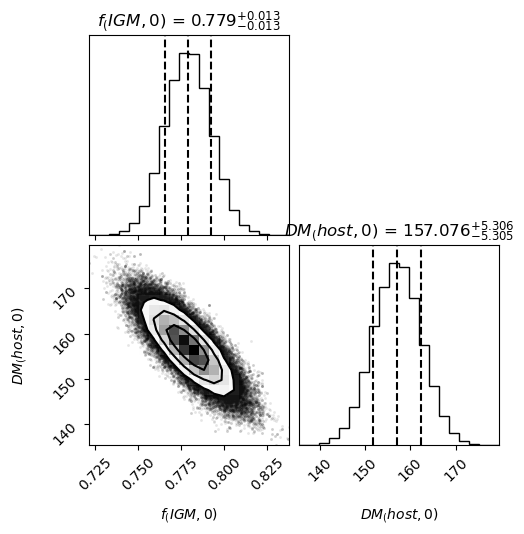

In [21]:
flat_samples = sampler.get_chain(discard=500, thin=2, flat=True)
print(flat_samples.shape)


fig = corner.corner(
    flat_samples,
    labels=[r"$f_(IGM,0)$", r"$DM_(host,0)$"],
    #range=[(0.1, 0.4),( -0.4,0),(-2.5,0)],
    show_titles=True,
    title_fmt=".3f",
    quantiles=[0.16, 0.50, 0.84]
)
plt.show()

In [25]:
mean = np.mean(flat_samples, axis=0)
std  = np.std(flat_samples, axis=0)

print("\nPosterior:")
print(f"f_IGM,0 = {mean[0]:.4f} ± {std[0]:.4f}")
print(f"DM_hot,0   = {mean[1]:.4f} ± {std[1]:.4f}")


Posterior:
f_IGM,0 = 0.7791 ± 0.0133
DM_hot,0   = 157.0729 ± 5.3346
